In [1]:
import sys
sys.path.insert(1, '/home/msantola/MyPythonLibrary/AnalysisObservations/libobs/')
import climbasis as climb
from climbasis import *
import domain as dom
import myplot
import glob
from eofs.xarray import Eof
from myplot import *
import obsinfo as obs
from obsinfo import *



In [2]:
#source='/home/msantolaria/Documents/MyResearch/AnalysisObservations/'
#resultsDir=source + 'Results/'
#plotsDir=source + 'Plots/'

In [3]:
sourceData='/data/msantola/obs/'
#'/home/msantolaria/Documents/Data/'
#sourceData1=sourceData +'noaaV2c/'
sourceData3=sourceData +'aphro/'
sourceData4=sourceData +'gpcc/'
sourceData5=sourceData +'cru/'
#sourceData6=sourceData +'gpcp/'

In [4]:
!ls /data/msantola/obs/

aphro	cru	era5	   esacci  hadisst  hadslp2  ncep-ncar	noaaV2c  sndru
climpy	era20c	era5-land  gpcp    hadslp   jra55    noaacdr	sncru


In [5]:
iyr=1970
fyr=2010
domain='HMA'
latS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain(domain)  

variable='pr'
units='mm/day'
season='DJF'
exp='obs'

In [6]:
model3='aphro'
fileName3='APHRO_mon_MA_025deg_V1101_EXR1.1951-2015.nc'
ds3 = xr.open_dataset(sourceData3+fileName3)['precip']
field3=dom.field_dom(ds3,domain)
print(ds3.attrs)

{'long_name': 'daily precipitation analysis interpolated onto 0.25deg grids [mm/day]', 'units': 'mm/day', 'cell_methods': 'time: mean', 'level_description': 'Earth surface'}


In [7]:
model4='gpcp'
fileName4='precip_mon.gpcp_v2020_1891_2019_10.nc'
ds4= xr.open_dataset(sourceData+model4+'/'+fileName4)['precip']
print(ds4.attrs) 
#units in mm/month -> mm/day
lat,lon=climb.latlon(ds4)
ylat=ds4.coords[lat]
xlon=ds4.coords[lon]
field40=dom.field_dom(ds4,domain)

month_length = field40.time.dt.days_in_month
#
field4=field40/month_length

{'long_name': 'gpcc full data monthly product version 2020, precipitation per grid', 'units': 'mm/month', 'code': 20, 'institution': 'DWD'}


In [8]:
model5='cru'
fileName5='cru_ts4.05.1901.2020.pre.dat.nc'
ds5 = xr.open_dataset(sourceData5+fileName5)['pre']
print(ds5.attrs)
#units in mm/month -> mm/day
field50=dom.field_dom(ds5,domain)
month_length = field50.time.dt.days_in_month
#
field5=field50/month_length

{'long_name': 'precipitation', 'units': 'mm/month', 'correlation_decay_distance': 450.0}


In [9]:
##EXAMPLE ONE DATA SET (plots mainly)

In [10]:
#seasonal/monthly selection
vals,anoms=climb.seasonal_selection(field3,season,iyr,fyr)

(D- 1970  JF- 1971  to D- 2010 JF- 2011


In [11]:
##Spatial
clim=vals.mean("time")
std=vals.std("time")
par=climb.trend_vect(vals.time,vals,dim='time')

trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4


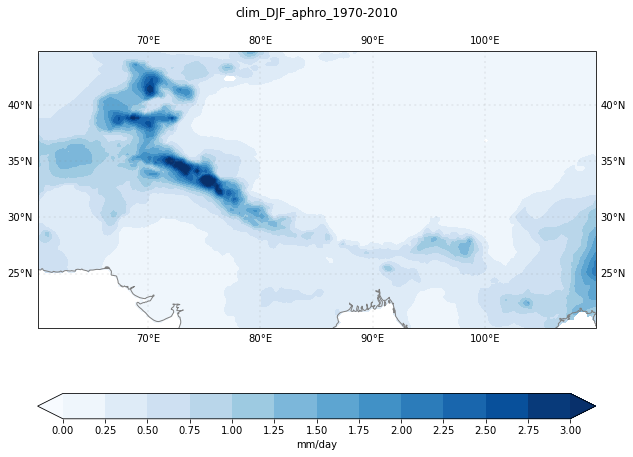

In [12]:
plot=clim
title="clim"+'_'+season+'_'+model3+'_'+ str(iyr)+'-'+str(fyr)
clevs=np.arange(0,3.25,0.25);levs_ticks=clevs;cmap='Blues'

fig, axs = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,8))

lons, lats = np.meshgrid(plot.coords[plot.dims[1]],plot.coords[plot.dims[0]])
CS1=axs.contourf(lons,lats,plot[:,:],clevs,transform=ccrs.PlateCarree(),cmap=cmap,extend='both')
axs.set_title(title,y=1.1)#,x=0.025,y=0.93,backgroundcolor= 'white')

axs.coastlines(color='grey')
gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=2, color='gray', alpha=0.1, linestyle=':')

cbar=fig.colorbar(CS1,ticks=levs_ticks,orientation='horizontal',label=units)

plt.show()

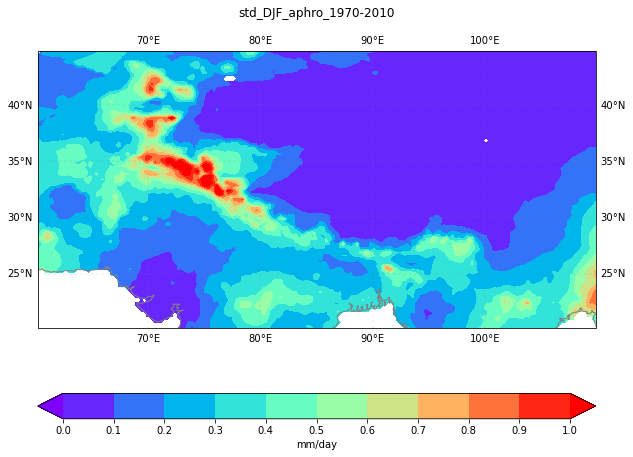

In [13]:
plot=std
title="std"+'_'+season+'_'+model3+'_'+ str(iyr)+'-'+str(fyr)
clevs=np.arange(0,1.1,0.1);levs_ticks=clevs;cmap='rainbow'

fig, axs = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,8))

lons, lats = np.meshgrid(plot.coords[plot.dims[1]],plot.coords[plot.dims[0]])
CS1=axs.contourf(lons,lats,plot[:,:],clevs,transform=ccrs.PlateCarree(),cmap=cmap,extend='both')
axs.set_title(title,y=1.1)#,x=0.025,y=0.93,backgroundcolor= 'white')

axs.coastlines(color='grey')
gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=2, color='gray', alpha=0.1, linestyle=':')

cbar=fig.colorbar(CS1,ticks=levs_ticks,orientation='horizontal',label=units)

plt.show()

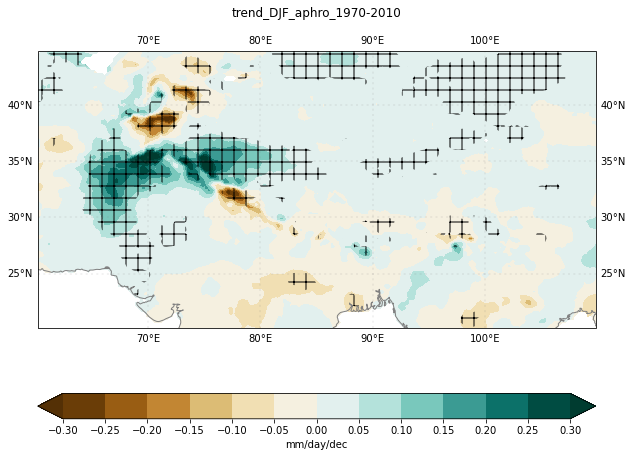

In [17]:
plot=par[0]*10
sig=par[3]

title="trend"+'_'+season+'_'+model3+'_'+ str(iyr)+'-'+str(fyr)
clevs=np.arange(-0.3,0.35,0.05);levs_ticks=clevs;cmap='BrBG'

fig, axs = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,8))

lons, lats = np.meshgrid(plot.coords[plot.dims[1]],plot.coords[plot.dims[0]])
CS1=axs.contourf(lons,lats,plot,clevs,transform=ccrs.PlateCarree(),cmap=cmap,extend='both')
levels=[0,0.1,1.0]
cs = axs.contourf(lons,lats,sig[:,:], transform=ccrs.PlateCarree(),levels=levels,
                hatches=["+", ""], alpha=0.)
axs.set_title(title,y=1.1)#,x=0.025,y=0.93,backgroundcolor= 'white')

axs.coastlines(color='grey')
gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=2, color='gray', alpha=0.1, linestyle=':')

cbar=fig.colorbar(CS1,ticks=levs_ticks,orientation='horizontal',label=units+'/dec')

plt.show()

In [19]:
##Average
##Time series and trend
ts=climb.spatial_average(vals)
par_avg=stats.linregress(ts.time,ts)



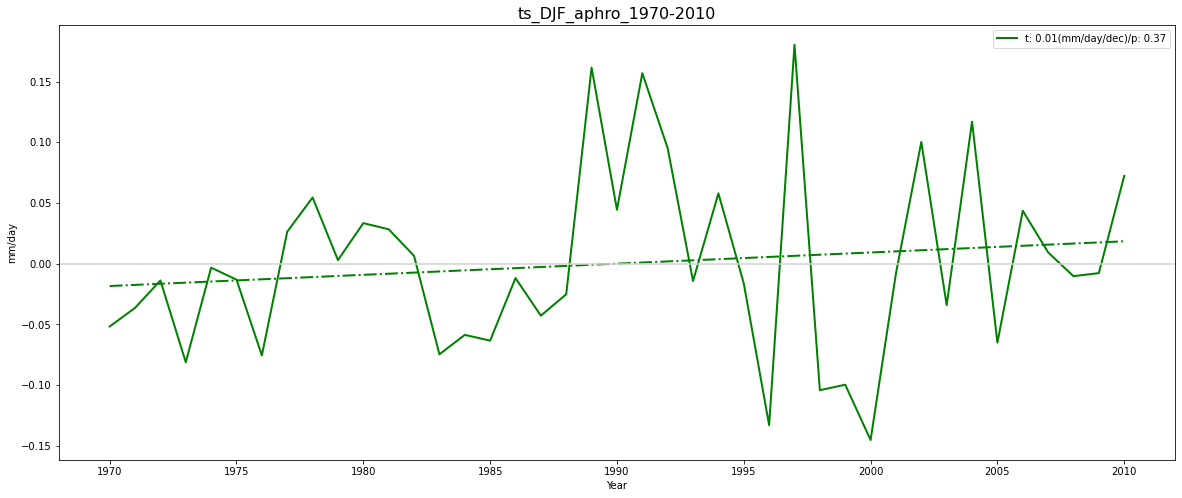

In [30]:
title="ts"+'_'+season+'_'+model3+'_'+ str(iyr)+'-'+str(fyr)
fig, ax = plt.subplots(figsize=(20, 8))
my_ticks=np.arange(iyr,fyr+1,1)
ax.plot(ts.time,ts,color='green', linestyle='solid',label='t: '+str(round(10*par_avg[0], 2))+'('+units+'/dec)'+'/'+ 'p: '+str(round(par_avg[3], 2)),linewidth=2)
ax.plot(ts.time,par_avg[0]*ts.time+par_avg[1],color='green', linestyle='-.',linewidth=2)

ax.axhline(0, color='lightgrey')
#ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel(units)
plt.legend()
ax.set_title(title, fontsize=16)
#plt.savefig(resultsDir+plotnameTs+'.png',format='png')
plt.show()

In [48]:
##Annual cycle: mean and trend 
calendar_avg=[]
calendar_par=[]
monthList=['mon01','mon02','mon03','mon04','mon05','mon06','mon07','mon08','mon09','mon10','mon11','mon12']
for i in np.arange(0,12,1):
    rmon=monthList[i]
    v,a=climb.monthly_selection(field3,rmon,iyr,fyr)
    avg0=climb.spatial_average(v)
    avg=avg0.mean(dim='time')
    par=stats.linregress(np.arange(iyr,fyr+1,1),avg0)
    calendar_avg.append(avg)
    calendar_par.append(par)

latitude longitude
latitude longitude
latitude longitude
latitude longitude
latitude longitude
latitude longitude
latitude longitude
latitude longitude
latitude longitude
latitude longitude
latitude longitude
latitude longitude


In [49]:
calendar_avg

[<xarray.DataArray ()>
 array(0.38707147),
 <xarray.DataArray ()>
 array(0.51831866),
 <xarray.DataArray ()>
 array(0.65818265),
 <xarray.DataArray ()>
 array(0.95303502),
 <xarray.DataArray ()>
 array(1.56374354),
 <xarray.DataArray ()>
 array(2.6723099),
 <xarray.DataArray ()>
 array(3.66091839),
 <xarray.DataArray ()>
 array(3.35648549),
 <xarray.DataArray ()>
 array(2.28909902),
 <xarray.DataArray ()>
 array(1.04007372),
 <xarray.DataArray ()>
 array(0.44394068),
 <xarray.DataArray ()>
 array(0.31208537)]

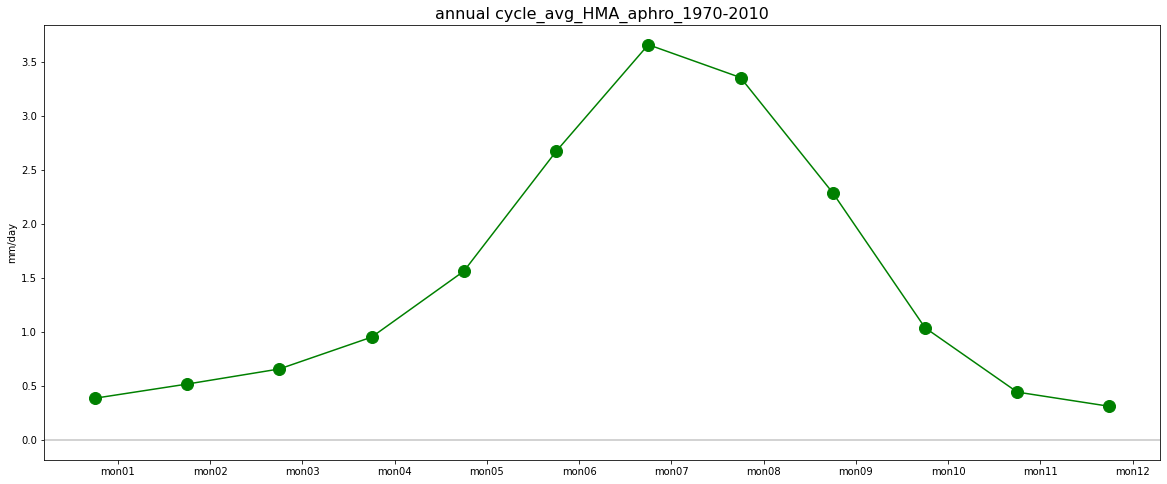

In [54]:
xd=np.arange(0,12,1)
nameList=monthList
title="annual cycle_"+"avg_"+domain+'_'+ model3+'_'+ str(iyr)+'-'+str(fyr)
fig, axes = plt.subplots(figsize=(20, 8))
#for x,y,yerr,p,m,colors in zip(xd,trendYO,std_errYO,pvalueYO,nameList,colorList):
axes.errorbar(xd,calendar_avg,marker='o',color='green',markersize=12)
axes.axhline(y=0.0, linewidth=2, color='lightgrey')
axes.set(xticks=xd+0.25, xticklabels=nameList)
axes.set_ylabel(units)
axes.set_title(title, fontsize=16)

plt.show()

In [55]:
##annnual cycle trend
trend=[];pvalue=[];std_err=[]
for i in range(len(calendar_par)):
    tmp=10*calendar_par[i][0]; tmp1=calendar_par[i][3];tmp2=10*calendar_par[i][4]
    trend.append(tmp);pvalue.append(tmp1);std_err.append(tmp2)

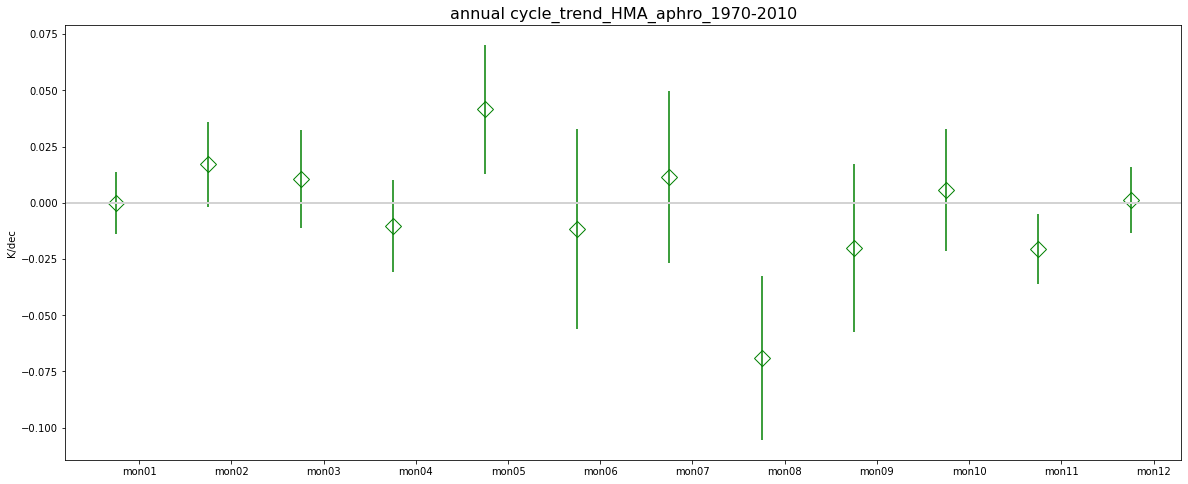

In [56]:
xd=np.arange(0,12,1)
nameList=monthList
title="annual cycle_"+"trend_"+domain+'_'+ model3+'_'+ str(iyr)+'-'+str(fyr)
fig, axes = plt.subplots(figsize=(20, 8))
#for x,y,yerr,p,m,colors in zip(xd,trendYO,std_errYO,pvalueYO,nameList,colorList):
for i in range(12):
    if pvalue[i]<=0.01:
        axes.errorbar(xd[i],trend[i],yerr=std_err[i],marker='D',color='green',markersize=12)
    else:
        axes.errorbar(xd[i],trend[i],yerr=std_err[i],marker='D',fillstyle='none',mfc='white', zorder=1,color='green',markersize=12)
axes.axhline(y=0.0, linewidth=2, color='lightgrey')
axes.set(xticks=xd+0.25, xticklabels=nameList)
axes.set_ylabel('K/dec')
axes.set_title(title, fontsize=16)

plt.show()

In [57]:

## SAME ANALYSIS BUT FOR multiple data sets(at the same time): lists
dsList=[field3,field4,field5]
modelList=[model3,model4,model5]

In [58]:
valsList=[]
anomsList=[]

for elem in dsList:
    if season[0]=='m':
        rmon=int(season.split('mon')[1])
        vals,anoms=climb.monthly_selection(elem,rmon,iyr,fyr)
    else:
        vals,anoms=climb.seasonal_selection(elem,season,iyr,fyr)
    valsList.append(vals)
    anomsList.append(anoms)

(D- 1970  JF- 1971  to D- 2010 JF- 2011
(D- 1970  JF- 1971  to D- 2010 JF- 2011
(D- 1970  JF- 1971  to D- 2010 JF- 2011


In [59]:
climList=[]
stdList=[]
for elem in valsList:
    c=elem.mean('time')
    s=elem.std('time')
    climList.append(c)
    stdList.append(s)

In [ ]:
##Plotting


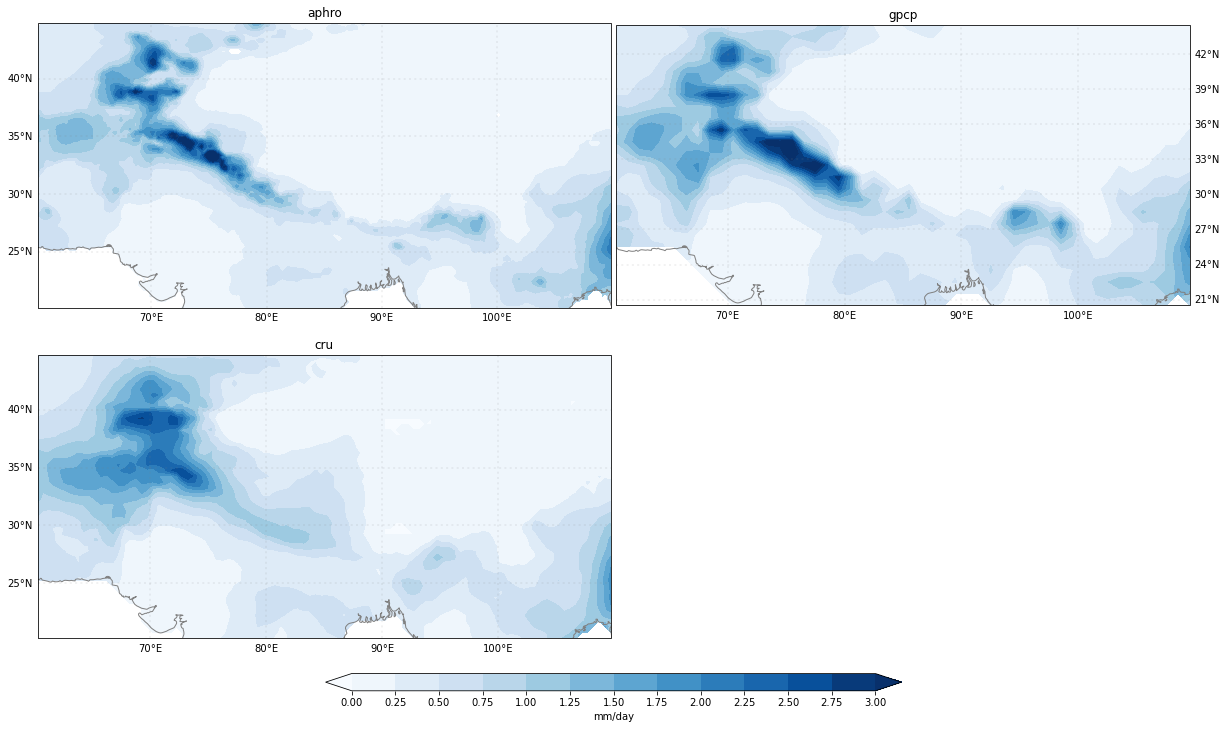

In [65]:
plotList=climList
clevs=np.arange(0,3.25,0.25);levs_ticks=clevs 
cmap='Blues'
nrows=2
ncols=2 

fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},figsize=(20,20))
axs=axs.flatten()
for i in np.arange(0,len(plotList),1):
    lons, lats = np.meshgrid(plotList[i].coords[plotList[i].dims[1]],plotList[i].coords[plotList[i].dims[0]])
    CS1=axs[i].contourf(lons,lats,plotList[i][:,:],clevs,transform=ccrs.PlateCarree(),cmap=cmap,extend='both')
    axs[i].coastlines(color='grey')
    axs[i].set_title(modelList[i])#,x=0.025,y=0.93,backgroundcolor= 'white')
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=2, color='gray', alpha=0.1, linestyle=':')
    gl.xlabels_top = False
    if (i% 2) == 0:
        gl.ylabels_right = False
    else:
        gl.ylabels_right = True
        gl.ylabels_left = False
    gl.set_ylocator=mticker.FixedLocator(np.arange(latS,latN,5),0)
    gl.set_xlocator = mticker.FixedLocator(np.arange(lonW,lonE,10),0)
    gl.set_xformatter = LongitudeFormatter;gl.set_yformatter = LatitudeFormatter
    gl.set_xlabel_style = {'color': 'black'};gl.set_xlabel_style = {'color': 'black'}   

    fig.subplots_adjust(bottom=0.38, top=0.84, left=0.10, right=0.90,wspace=0.010, hspace=0.001)
axs[3].remove()   

cbar_ax = fig.add_axes([0.3, 0.36, 0.4, 0.012])

cbar=fig.colorbar(CS1, cax=cbar_ax,ticks=levs_ticks,orientation='horizontal',label=units)

#plotname='FIG3_GRL_COAFuture'
#plt.savefig(plotsDir+plotname+'.png',format='png',bbox_inches='tight')
plt.show()

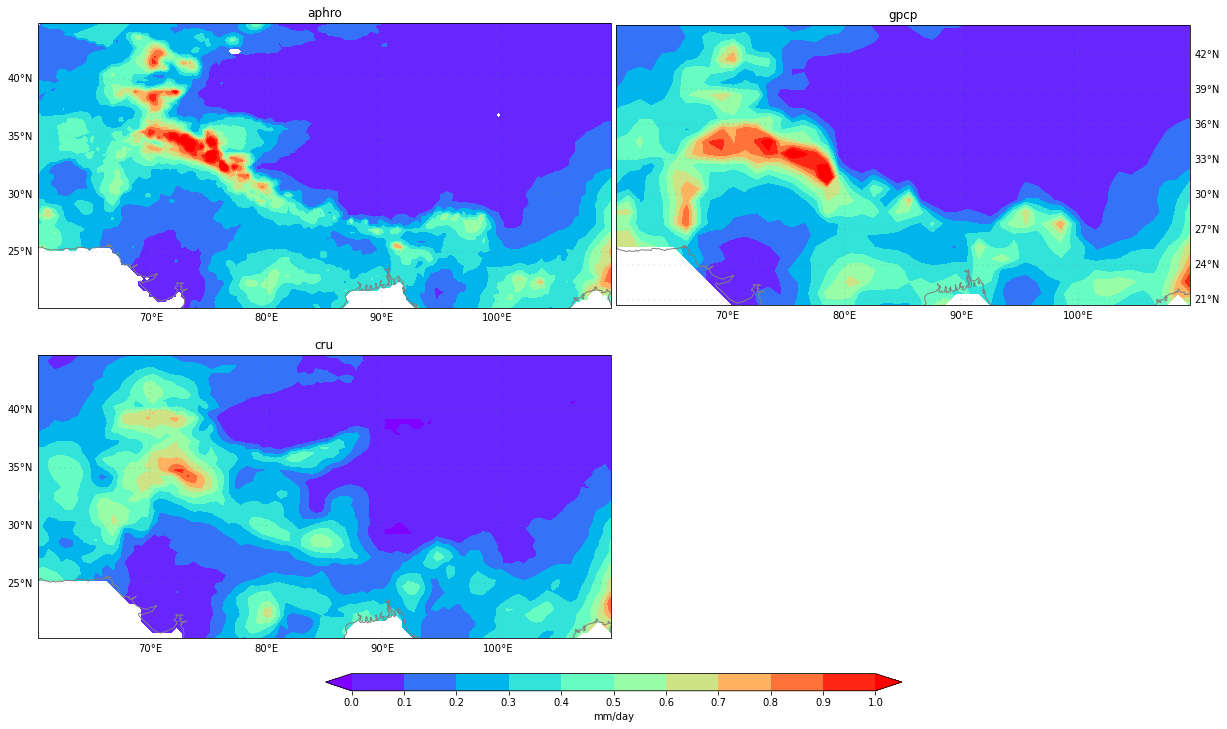

In [66]:
plotList=stdList
clevs=np.arange(0,1.1,0.1);levs_ticks=clevs 
cmap='rainbow'
nrows=2
ncols=2 

fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},figsize=(20,20))
axs=axs.flatten()
for i in np.arange(0,len(plotList),1):
    lons, lats = np.meshgrid(plotList[i].coords[plotList[i].dims[1]],plotList[i].coords[plotList[i].dims[0]])
    CS1=axs[i].contourf(lons,lats,plotList[i][:,:],clevs,transform=ccrs.PlateCarree(),cmap=cmap,extend='both')
    axs[i].coastlines(color='grey')
    axs[i].set_title(modelList[i])#,x=0.025,y=0.93,backgroundcolor= 'white')
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=2, color='gray', alpha=0.1, linestyle=':')
    gl.xlabels_top = False
    if (i% 2) == 0:
        gl.ylabels_right = False
    else:
        gl.ylabels_right = True
        gl.ylabels_left = False
    gl.set_ylocator=mticker.FixedLocator(np.arange(latS,latN,5),0)
    gl.set_xlocator = mticker.FixedLocator(np.arange(lonW,lonE,10),0)
    gl.set_xformatter = LongitudeFormatter;gl.set_yformatter = LatitudeFormatter
    gl.set_xlabel_style = {'color': 'black'};gl.set_xlabel_style = {'color': 'black'}   

    fig.subplots_adjust(bottom=0.38, top=0.84, left=0.10, right=0.90,wspace=0.010, hspace=0.001)
axs[3].remove()   

cbar_ax = fig.add_axes([0.3, 0.36, 0.4, 0.012])

cbar=fig.colorbar(CS1, cax=cbar_ax,ticks=levs_ticks,orientation='horizontal',label=units)

#plotname='FIG3_GRL_COAFuture'
#plt.savefig(plotsDir+plotname+'.png',format='png',bbox_inches='tight')
plt.show()

In [ ]:
##To create individual figures

for i,clim in enumerate(climList):
    latS,latN,lonW,lonE,latlim,lonlim=dom.coord_domain(domain)

    fig,axs= plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize=(8,10))
    lat,lon=climb.latlon(clim)
    lons, lats = np.meshgrid(clim[lon] ,clim[lat])
    CS1=axs.contourf(lons,lats, clim,clevsClim,
            transform=ccrs.PlateCarree(),
            cmap=cmapClim,extent='both')
# Draw the coastines for each subplot
    axs.coastlines()
    axs.add_feature(cfeature.BORDERS, linestyle=':', alpha=1)
#axs.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='None', facecolor='None'))
    if extentTF==True:
        axs.set_extent([lonW, lonE, latS,latN])
    # Longitude and latitude labels
# Adjust the location of the subplots on the page to make room for the colorbar
    fig.subplots_adjust(bottom=0.35, top=0.7, left=0.20, right=0.80,
                wspace=0.05, hspace=0.5)
# Add a colorbar axis at the bottom of the graph
#([xmin,ymin,dx,dy])
    cbar_ax = fig.add_axes([0.2, 0.35, 0.6, 0.02])
# Draw the colorbar
    cbar=fig.colorbar(CS1, cax=cbar_ax,orientation='horizontal',label='%s'%(units))
## Add a big title at the top
    ofileC='clim_'+variable+'_'+modelList[i]+'_'+exp+'_'+domain+'_'+season+'_'+str(iyr)+'_'+str(fyr)
    plt.suptitle(ofileC,y=0.68)
    #fig.savefig(plotsDir+ofileC+'.png',format='png')
    #print('Figure save at ',plotsDir, 'as',ofileC)
    plt.show()


In [67]:
##Spatial trends

parList=[]
trendList=[]
interceptList=[]
rvalueList=[]
pvalueList=[]
stderrList=[]
#---------------------------------------------------------
for elem in anomsList:
    par=climb.trend_vect(elem.time,elem,'time')
    parList.append(par)
    trendList.append(par[0])
    interceptList.append(par[1])
    rvalueList.append(par[2])
    pvalueList.append(par[3])
    stderrList.append(par[4])


trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4
trend-0 intercept-1 rvalue-2 pvalue-3 stderr-4


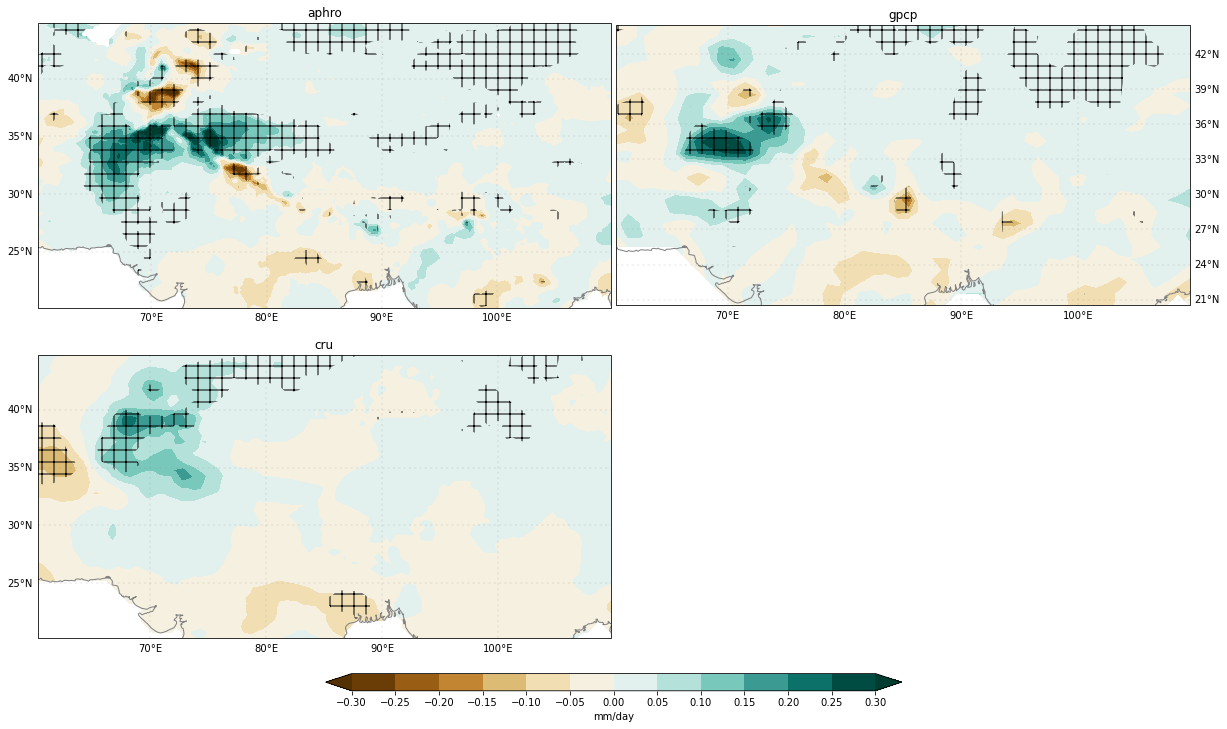

In [69]:
plotList=parList
clevs=np.arange(-0.3,0.35,0.05);levs_ticks=clevs 
cmap='BrBG'
nrows=2
ncols=2 

fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},figsize=(20,20))
axs=axs.flatten()
for i in np.arange(0,len(plotList),1):
    lons, lats = np.meshgrid(plotList[i][0].coords[plotList[i][0].dims[1]],plotList[i][0].coords[plotList[i][0].dims[0]])
    CS1=axs[i].contourf(lons,lats,10*plotList[i][0][:,:],clevs,transform=ccrs.PlateCarree(),cmap=cmap,extend='both')
    levels=[0,0.1,1.0]
    cs = axs[i].contourf(lons,lats,plotList[i][3][:,:], transform=ccrs.PlateCarree(),levels=levels,
                hatches=["+", ""], alpha=0.)

    axs[i].coastlines(color='grey')
    axs[i].set_title(modelList[i])#,x=0.025,y=0.93,backgroundcolor= 'white')
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=2, color='gray', alpha=0.1, linestyle=':')
    gl.xlabels_top = False
    if (i% 2) == 0:
        gl.ylabels_right = False
    else:
        gl.ylabels_right = True
        gl.ylabels_left = False
    gl.set_ylocator=mticker.FixedLocator(np.arange(latS,latN,5),0)
    gl.set_xlocator = mticker.FixedLocator(np.arange(lonW,lonE,10),0)
    gl.set_xformatter = LongitudeFormatter;gl.set_yformatter = LatitudeFormatter
    gl.set_xlabel_style = {'color': 'black'};gl.set_xlabel_style = {'color': 'black'}   

    fig.subplots_adjust(bottom=0.38, top=0.84, left=0.10, right=0.90,wspace=0.010, hspace=0.001)
axs[3].remove()   

cbar_ax = fig.add_axes([0.3, 0.36, 0.4, 0.012])

cbar=fig.colorbar(CS1, cax=cbar_ax,ticks=levs_ticks,orientation='horizontal',label=units)

#plotname='FIG3_GRL_COAFuture'
#plt.savefig(plotsDir+plotname+'.png',format='png',bbox_inches='tight')
plt.show()


In [71]:
##Computing time series of seasonal spatial average ----------------------------
print('Computing time series of seasonal spatial average')
ts_seasonList=[]
for i,anoms in enumerate(anomsList):
    ts_season=climb.spatial_average(anoms)
    ts_seasonList.append(ts_season)
    plotnameTs='timeseries_anoms_'+variable+'_'+modelList[i]+'_'+exp+'_'+domain+'_'+season+'_'+str(iyr)+'_'+str(fyr)
    #np.savetxt(resultsDir+plotnameTs+'.txt',ts_season)
   # print('saving .txt at',resultsDir+plotnameTs)


Computing time series of seasonal spatial average


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40] [1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010]


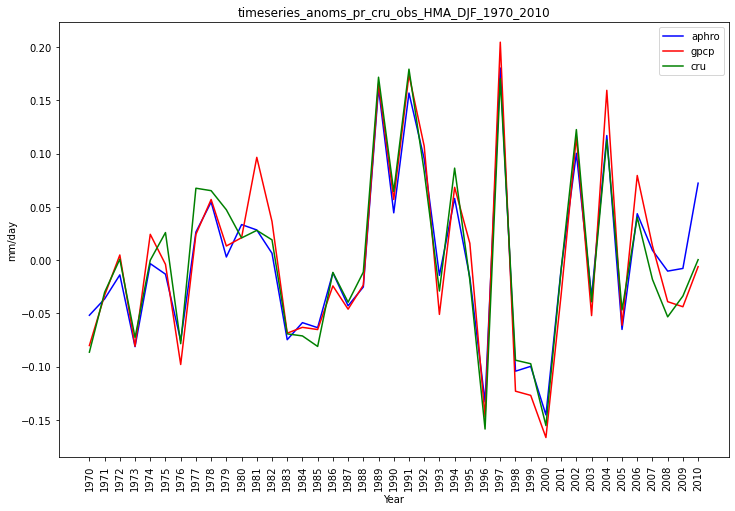

In [73]:
xd=np.arange(0,len(ts_season),1)

fig, ax = plt.subplots(figsize=(12, 8))
my_ticks=xd+iyr
print(xd,my_ticks)
ticks=np.arange(iyr,fyr+1,1)
#ax.plot(xd,ts_season,color='b', linewidth=2)
ax.plot(xd, ts_seasonList[0], 'b',label=modelList[0])
ax.plot(xd, ts_seasonList[1], 'r',label=modelList[1])
ax.plot(xd, ts_seasonList[2], 'g',label=modelList[2])
#ax.plot(xd, ts_seasonList[3], 'orange',label=modelList[3])

#ax.plot(xd, parmed[1] + parmed[0] * xd, 'r-',label="%s (%.2f)" % ('Theil-Sen', 10*parmed[0]))
#ax.plot(xd, parmed[1] + parmed[2] * xd, 'r--')
#ax.plot(xd, parmed[1] + parmed[3] * xd, 'r--')
#ax.plot(xd, par[1] + par[0] * xd, 'b-',label="%s (%.2f);%s (%.2f)" % ('Lin reg', 10*par[0],'p-val',par[3]))
#ax.plot(xd, parmk[8] + parmk[7] * xd,'p-',label="%s (%.2f) sig %s" % ('MK',i 10*parmk[7],parmk[0]))

#ax.axhline(0, color='k')
#ax.set_ylim(0, 3)
ax.set_xlabel('Year')
ax.set_ylabel('%s'%(units))
ax.set_title(plotnameTs)
freq=5
plt.xticks(xd,my_ticks, rotation='vertical')
plt.legend()
#plt.savefig(plotsDir+plotnameTs+'.png',format='png')
plt.show()
